In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
# from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os


In [141]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [142]:
# Creating training set
training_set = train_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/Training-validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 classes=['Myringosclerosis', 'Normal'] )
# Creating the Test set
test_set = test_datagen.flow_from_directory('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            classes=['Myringosclerosis', 'Normal'] )


Found 360 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [143]:
training_set.class_indices

{'Myringosclerosis': 0, 'Normal': 1}

In [144]:
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/binary_classification.hdf5')

In [145]:
print(history.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 256)       7168      
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                     

In [146]:
# model.save('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained.hdf5')

In [147]:
# history = load_model('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained.hdf5')

In [148]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/Testing', # Put your path here
     target_size=(64, 64),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = history.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# predictions = model.predict(test_set, steps=test_steps_per_epoch)

def convert_array(arr_2d):
    arr_1d = np.zeros(arr_2d.shape[0])
    arr_1d[arr_2d[:, 0] >= 1] = 1
    return arr_1d

# predicted_classes = np.argmax(predictions, axis = 1)
predicted_classes = convert_array(predictions)

Found 80 images belonging to 2 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_17896\1080461175.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17896\1080461175.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = history.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [149]:
predictions

array([[0.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [5.929397e-11],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [1.0

In [150]:
predicted_classes

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [151]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [152]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [153]:
# class_labels

In [154]:
import numpy as np

# Ensure that both arrays have the same length
max_samples = min(len(true_classes), len(predicted_classes))
true_classes = true_classes[:max_samples]
predicted_classes = predicted_classes[:max_samples]

from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  
  

                  precision    recall  f1-score   support

Myringosclerosis       0.88      0.88      0.88        40
          Normal       0.88      0.88      0.88        40

        accuracy                           0.88        80
       macro avg       0.88      0.88      0.88        80
    weighted avg       0.88      0.88      0.88        80



In [155]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [156]:
class_labels

['Myringosclerosis', 'Normal']

<Axes: >

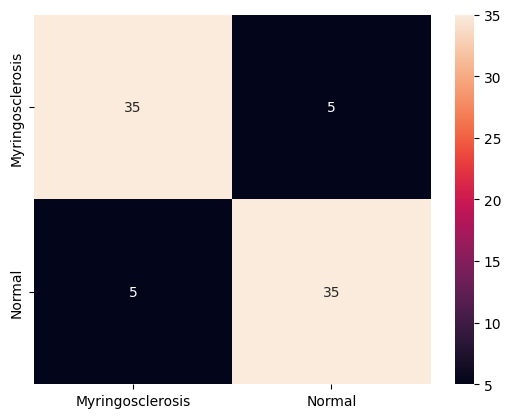

In [157]:
from sklearn.metrics import confusion_matrix
# y_prded_labels = predicted_classes
# y_test = true_classes
# plt.figure(figsize(16 , 9))
import seaborn as sns
cm = confusion_matrix(true_classes , predicted_classes)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels = class_labels)

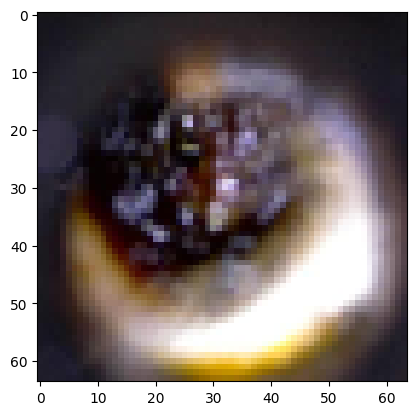

1/1 [==============================] - 0s 119ms/step
e1.jpg
abnormal


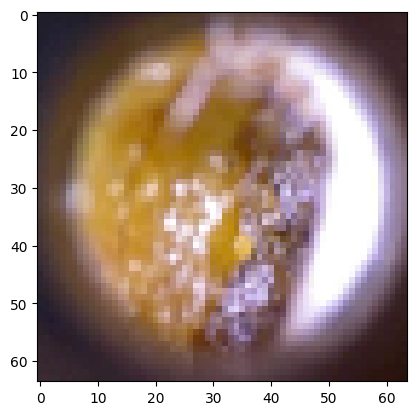

1/1 [==============================] - 0s 54ms/step
e10.jpg
abnormal


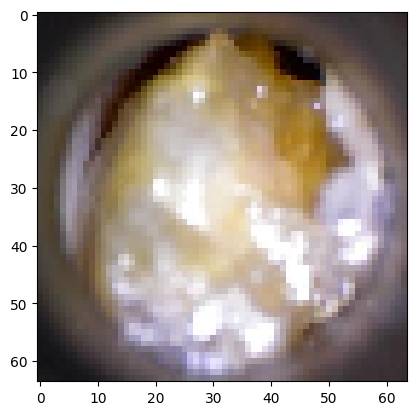

1/1 [==============================] - 0s 45ms/step
e11.jpg
normal


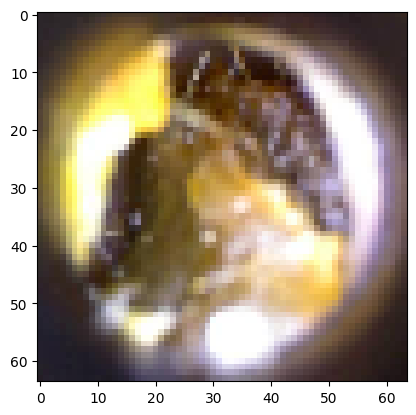

1/1 [==============================] - 0s 38ms/step
e12.jpg
normal


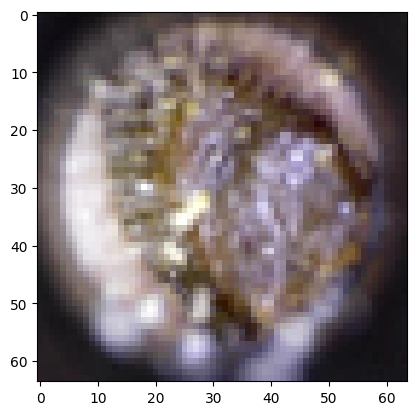

1/1 [==============================] - 0s 36ms/step
e13.jpg
abnormal


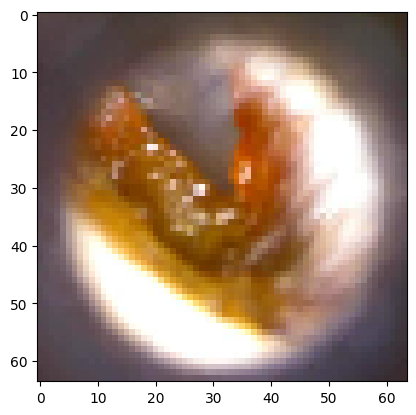

1/1 [==============================] - 0s 41ms/step
e14.jpg
abnormal


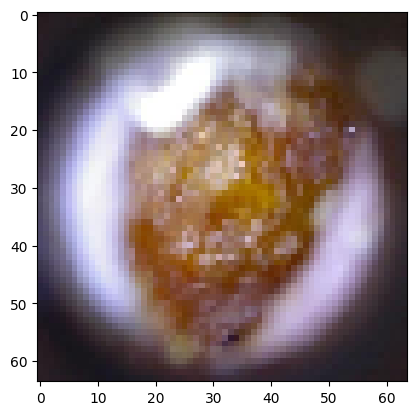

1/1 [==============================] - 0s 43ms/step
e15.jpg
normal


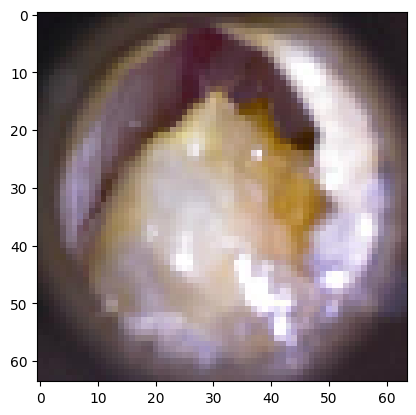

1/1 [==============================] - 0s 41ms/step
e16.jpg
normal


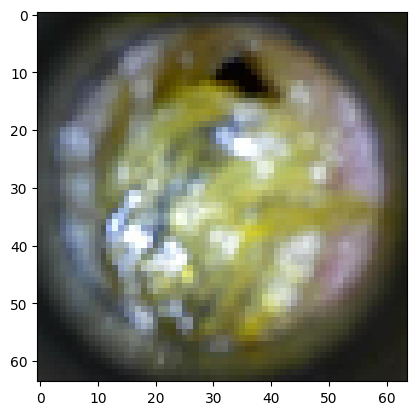

1/1 [==============================] - 0s 41ms/step
e17.jpg
abnormal


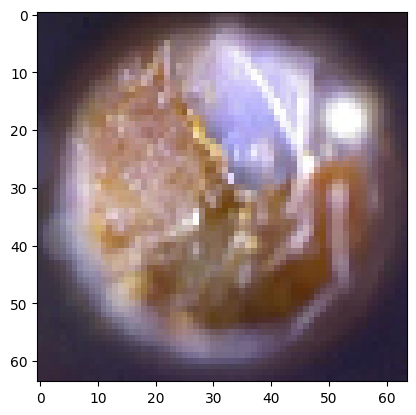

1/1 [==============================] - 0s 43ms/step
e18.jpg
abnormal


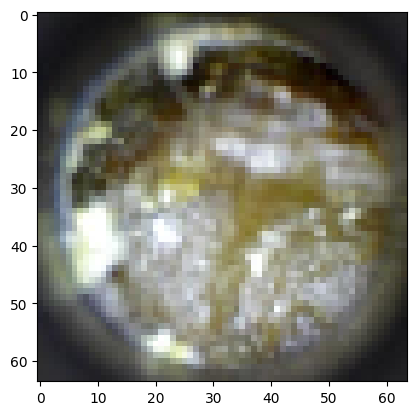

1/1 [==============================] - 0s 44ms/step
e19.jpg
normal


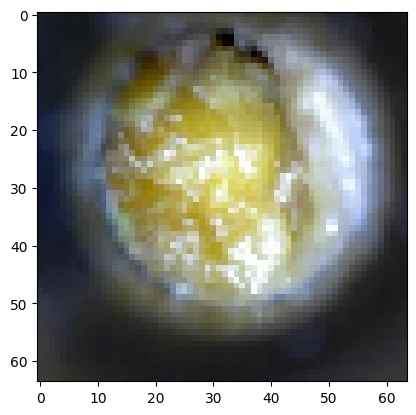

1/1 [==============================] - 0s 43ms/step
e2.jpg
normal


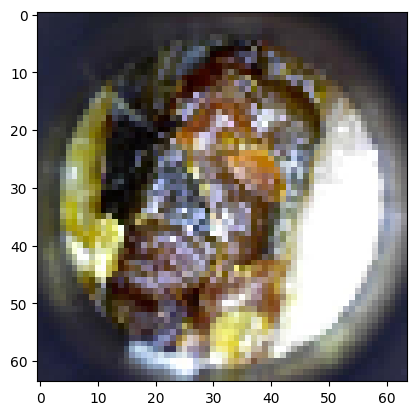

1/1 [==============================] - 0s 38ms/step
e20.jpg
abnormal


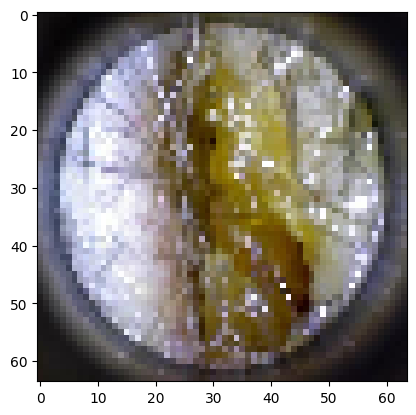

1/1 [==============================] - 0s 35ms/step
e21.jpg
abnormal


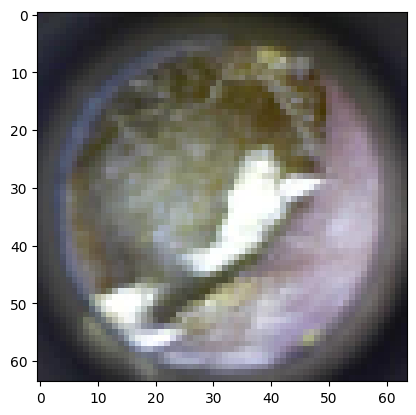

1/1 [==============================] - 0s 45ms/step
e22.jpg
normal


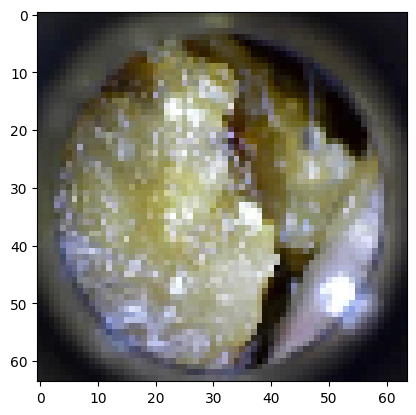

1/1 [==============================] - 0s 44ms/step
e23.jpg
abnormal


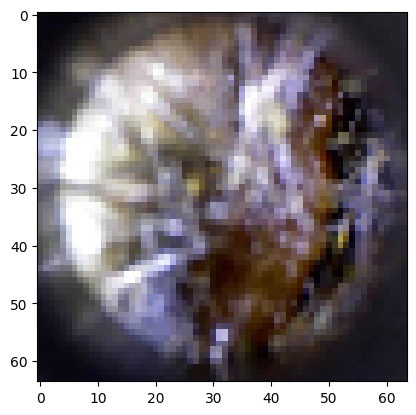

1/1 [==============================] - 0s 41ms/step
e24.jpg
abnormal


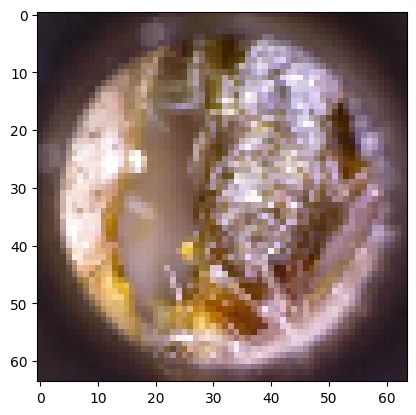

1/1 [==============================] - 0s 47ms/step
e25.jpg
normal


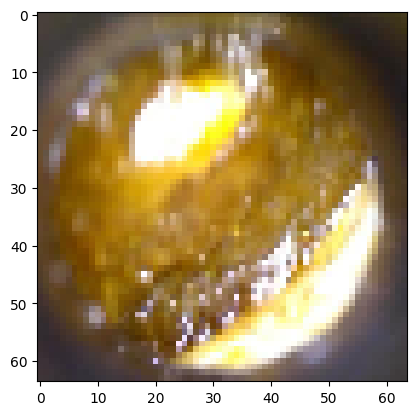

1/1 [==============================] - 0s 42ms/step
e26.jpg
normal


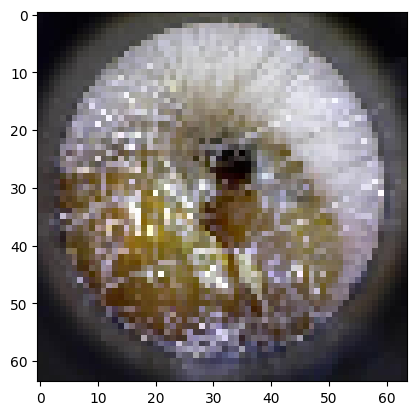

1/1 [==============================] - 0s 38ms/step
e27.jpg
abnormal


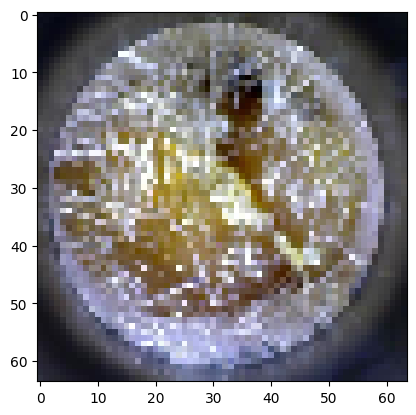

1/1 [==============================] - 0s 38ms/step
e28.jpg
abnormal


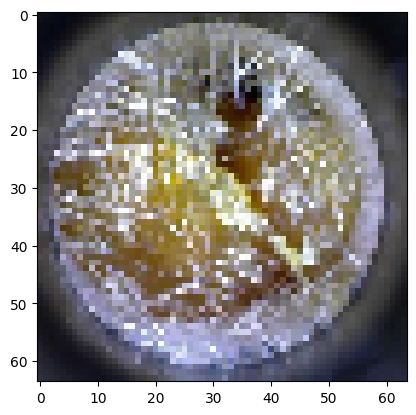

1/1 [==============================] - 0s 39ms/step
e29.jpg
abnormal


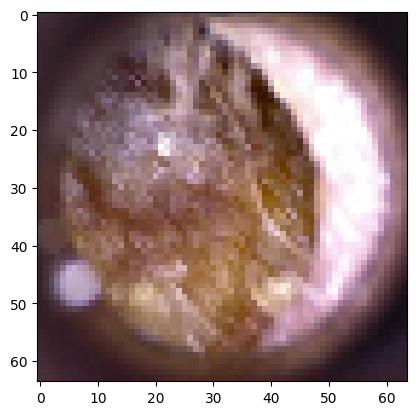

1/1 [==============================] - 0s 42ms/step
e3.jpg
normal


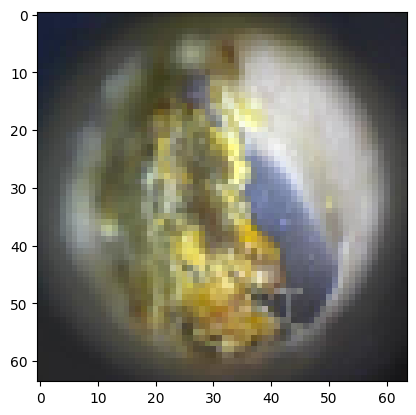

1/1 [==============================] - 0s 47ms/step
e30.jpg
abnormal


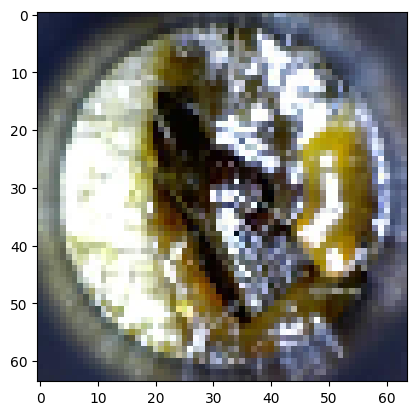

1/1 [==============================] - 0s 42ms/step
e31.jpg
abnormal


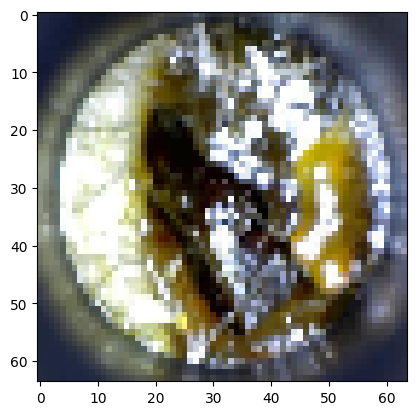

1/1 [==============================] - 0s 40ms/step
e32.jpg
abnormal


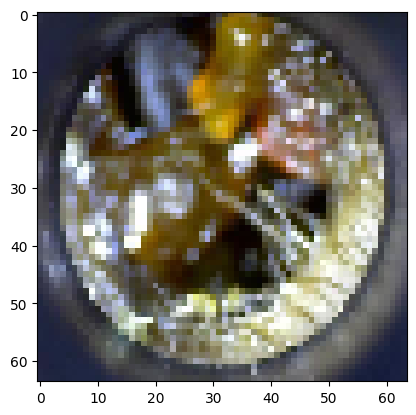

1/1 [==============================] - 0s 35ms/step
e33.jpg
abnormal


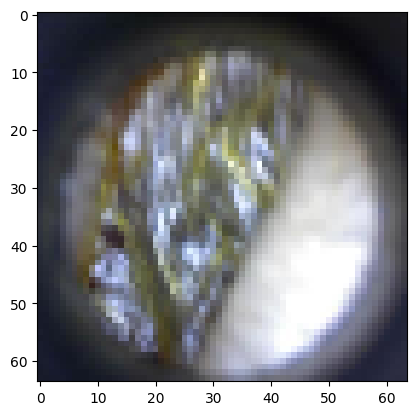

1/1 [==============================] - 0s 38ms/step
e34.jpg
abnormal


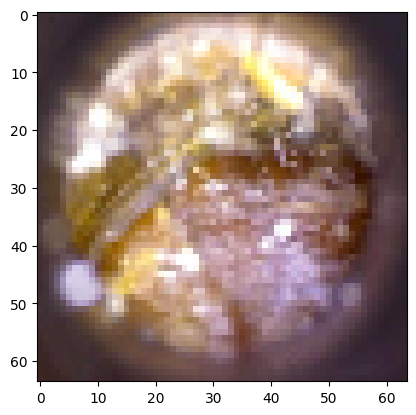

1/1 [==============================] - 0s 46ms/step
e35.jpg
abnormal


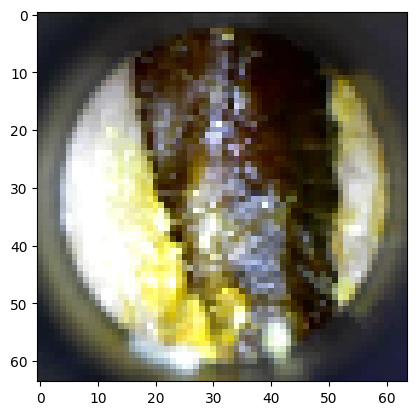

1/1 [==============================] - 0s 47ms/step
e36.jpg
abnormal


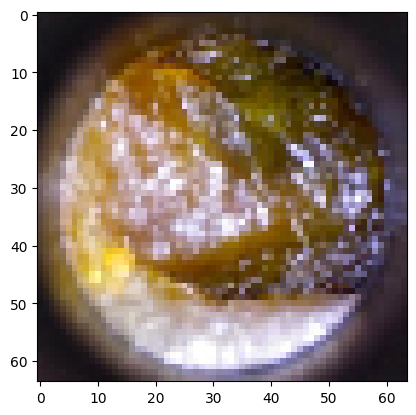

1/1 [==============================] - 0s 41ms/step
e37.jpg
abnormal


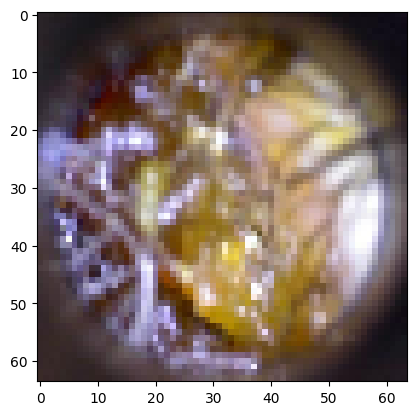

1/1 [==============================] - 0s 35ms/step
e38.jpg
abnormal


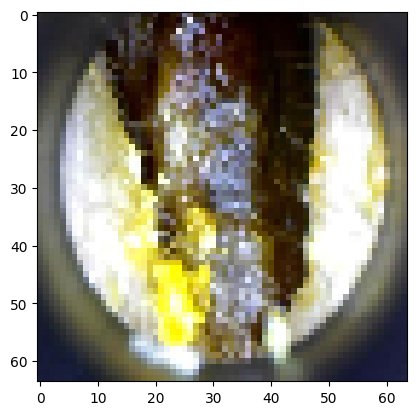

1/1 [==============================] - 0s 34ms/step
e39.jpg
abnormal


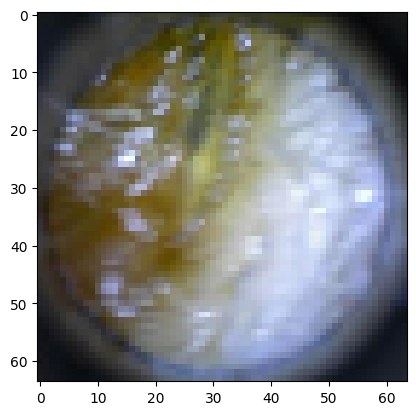

1/1 [==============================] - 0s 41ms/step
e4.jpg
normal


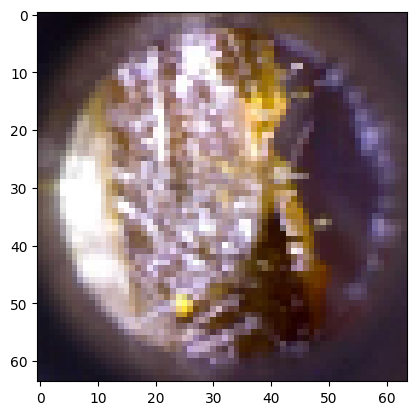

1/1 [==============================] - 0s 37ms/step
e40.jpg
abnormal


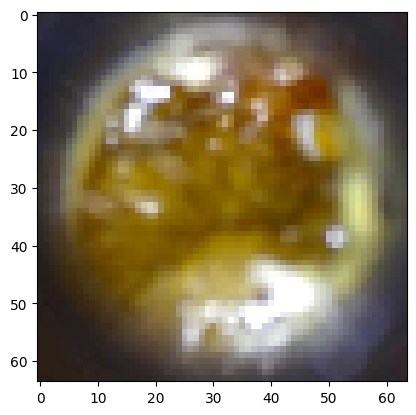

1/1 [==============================] - 0s 44ms/step
e5.jpg
abnormal


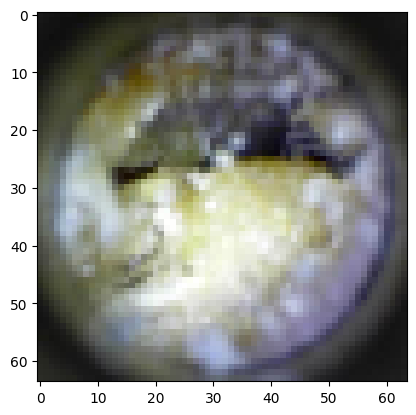

1/1 [==============================] - 0s 44ms/step
e6.jpg
normal


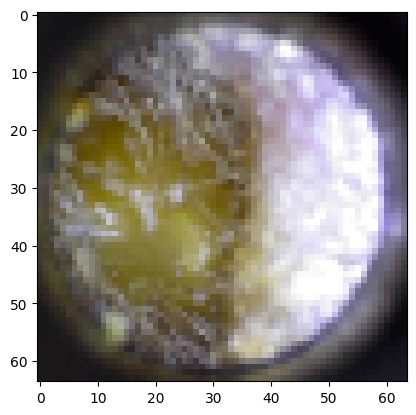

1/1 [==============================] - 0s 33ms/step
e7.jpg
normal


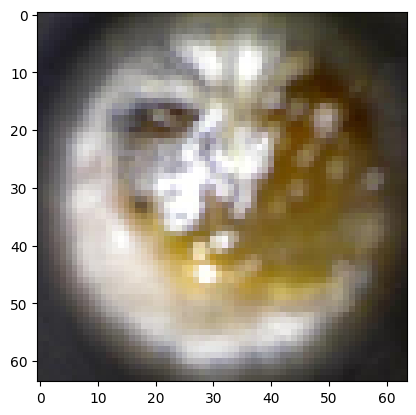

1/1 [==============================] - 0s 30ms/step
e8.jpg
normal


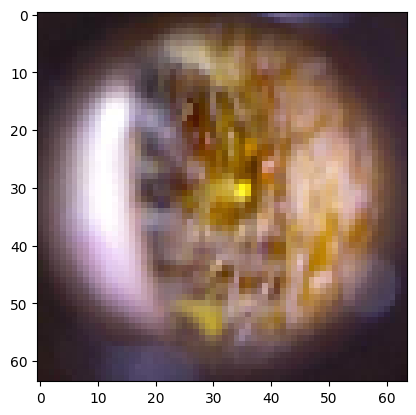

1/1 [==============================] - 0s 29ms/step
e9.jpg
abnormal


In [158]:
dir_path = 'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/Testing/Earwax plug'

# img = image.load_img('/content/drive/MyDrive/ear_data/tympanic_membrane_dataset_2/test/abnormal/aom (11).png')
# plt.imshow(img)

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(64,64))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis = 0)
  images = np.vstack([X])
  val = history.predict(images)
  print(i)
  if val == 0:
    print("abnormal")
  else:
    print("normal")

Found 80 images belonging to 2 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_1252\3468685822.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


3/3 [==============================] - 1s 210ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_1252\3468685822.py:37: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


3/3 [==============================] - 1s 180ms/step


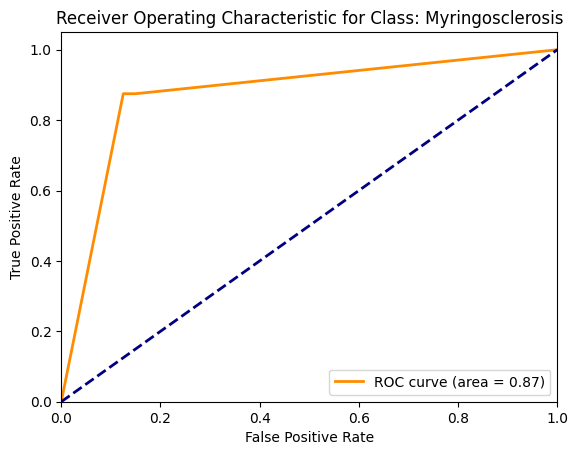

In [15]:

# ROC Curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing import image
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Rest of your code...
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    # 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive/tympanic_membrane_dataset_4class/test', # Put your path here
    'C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/Testing', # Put your path here
     target_size=(64, 64),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/binary_classification.hdf5')
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)


predicted_classes = np.argmax(predictions)
# Calculate test_steps_per_epoch
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# Predictions

# Rest of your code...

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.models import load_model
import matplotlib.pyplot as plt

# Define the class you want to create the ROC curve for
positive_class = 'Myringosclerosis'
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())
positive_class_index = class_labels.index(positive_class)

# Binarize the true classes
true_classes_bin = label_binarize(true_classes, classes=range(len(class_labels)))
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/binary_classification.hdf5')
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)
# Compute ROC curve and ROC area for the specific class
fpr, tpr, _ = roc_curve(true_classes_bin[:, positive_class_index], predictions[:, positive_class_index])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Class: {}'.format(positive_class))
plt.legend(loc="lower right")
plt.show()


3/3 [==============================] - 1s 216ms/step


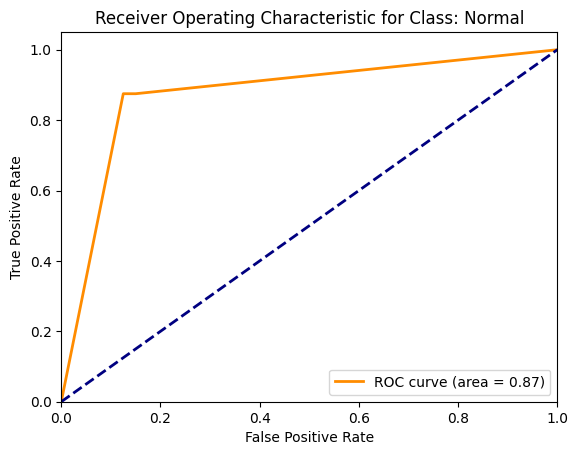

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve
positive_class = 'Normal'
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())
positive_class_index = class_labels.index(positive_class)

# Binarize the true classes
true_classes_bin = label_binarize(true_classes, classes=range(len(class_labels)))
history = load_model('C:/Users/Dell/Desktop/finalyrproject/Dataset otitis media/BinaryClassificationDataset/binary_classification.hdf5')
predictions = history.predict(test_data_generator, steps=test_steps_per_epoch)

fpr, tpr, thresholds = roc_curve(true_classes, predictions)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Class: {}'.format(positive_class))
plt.legend(loc="lower right")
plt.show()
